The goal of this project is to analyze weather data and forecast future temperatures using unsupervised learning and time series models. Initially, exploratory data analysis (EDA) will be performed to understand the dataset. Then, clustering techniques such as K-Means, Gaussian Mixture Models (GMM), and DBSCAN will be applied to identify patterns in the data. After that, ARIMA and SARIMAX models will be used for time series forecasting to predict future temperatures.
The models will be evaluated using Mean Absolute Error (MAE) and accuracy to determine the best forecasting method. The project will conclude with a comparison of the clustering results and forecasting model performances.


# Data Loading and basic evaluation




1.   Date is in incorrect format.
2.   Shape of the df is (679, 13)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [3]:
!gdown "10EKllD9JD8mITh5llT9hLm5HhZGV0LZV"
df=pd.read_csv('/content/Jaipur Data.csv')
df.head()

Downloading...
From: https://drive.google.com/uc?id=10EKllD9JD8mITh5llT9hLm5HhZGV0LZV
To: /content/Jaipur Data.csv
100% 38.5k/38.5k [00:00<00:00, 24.6MB/s]


date  meantempm  meandewptm  meanpressurem  maxhumidity  minhumidity  \
0  2016-05-01         34          -1        1005.63           24            4   
1  2016-05-02         36           4        1005.46           21            6   
2  2016-05-03         35           6        1006.00           27            5   
3  2016-05-04         34           7        1005.65           29            6   
4  2016-05-05         31          11        1007.94           61           13   

   maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  minpressurem  \
0        43        26          9        -10          1009           999   
1        43        29         10         -2          1008          1001   
2        41        29         12         -2          1009          1000   
3        41        27         13          0          1008          1001   
4        38        24         16          6          1011          1003   

   precipm  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      5.0

In [4]:
df.info()     #date is in the wrong format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           679 non-null    object 
 1   meantempm      679 non-null    int64  
 2   meandewptm     679 non-null    int64  
 3   meanpressurem  679 non-null    float64
 4   maxhumidity    679 non-null    int64  
 5   minhumidity    679 non-null    int64  
 6   maxtempm       679 non-null    int64  
 7   mintempm       679 non-null    int64  
 8   maxdewptm      679 non-null    int64  
 9   mindewptm      679 non-null    int64  
 10  maxpressurem   679 non-null    int64  
 11  minpressurem   679 non-null    int64  
 12  precipm        679 non-null    float64
dtypes: float64(2), int64(10), object(1)
memory usage: 69.1+ KB


In [5]:
df.describe().T     #data not normal

count         mean        std     min       25%      50%  \
meantempm      679.0    26.092784   6.223843   10.00    20.000    28.00   
meandewptm     679.0    11.951399   8.738194  -10.00     5.000    10.00   
meanpressurem  679.0  1009.493417   6.472317  997.63  1003.715  1008.81   
maxhumidity    679.0    67.265096  22.159195   15.00    50.000    66.00   
minhumidity    679.0    22.742268  19.363085    4.00     9.000    15.00   
maxtempm       679.0    32.567010   6.010402   18.00    28.000    33.00   
mintempm       679.0    19.667158   6.833975    3.00    13.000    22.00   
maxdewptm      679.0    16.147275   7.235735    0.00    10.000    15.00   
mindewptm      679.0     7.438881  11.694565  -94.00     0.000     6.00   
maxpressurem   679.0  1012.240059   6.520884  999.00  1006.000  1012.00   
minpressurem   679.0  1005.268041   7.124392  992.00   999.000  1004.00   
precipm        679.0     1.245066   5.424255    0.00     0.000     0.00   

                   75%      max  
meantempm        30.00    38.00  
meandewptm       21.00    26.00  
meanpressurem  1015.51  1023.43  
maxhumidity      88.00   100.00  
minhumidity      33.00    89.00  
maxtempm         37.00    46.00  
mintempm         25.00    32.00  
maxdewptm        23.00    29.00  
mindewptm        18.00    25.00  
maxpressurem   1018.00  1026.00  
minpressurem   1012.00  1020.00  
precipm           0.00    57.00

In [6]:
df.shape

(679, 13)

# Data Cleaning

In [7]:
df['date'] = pd.to_datetime(df['date'])     #converting date to proper format and then sorting the data on that basis and setting it as index
df = df.sort_values('date')
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679 entries, 2016-05-01 to 2018-03-11
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meantempm      679 non-null    int64  
 1   meandewptm     679 non-null    int64  
 2   meanpressurem  679 non-null    float64
 3   maxhumidity    679 non-null    int64  
 4   minhumidity    679 non-null    int64  
 5   maxtempm       679 non-null    int64  
 6   mintempm       679 non-null    int64  
 7   maxdewptm      679 non-null    int64  
 8   mindewptm      679 non-null    int64  
 9   maxpressurem   679 non-null    int64  
 10  minpressurem   679 non-null    int64  
 11  precipm        679 non-null    float64
dtypes: float64(2), int64(10)
memory usage: 69.0 KB


In [8]:
df.isnull().sum()     #No nulls

meantempm        0
meandewptm       0
meanpressurem    0
maxhumidity      0
minhumidity      0
maxtempm         0
mintempm         0
maxdewptm        0
mindewptm        0
maxpressurem     0
minpressurem     0
precipm          0
dtype: int64

In [9]:
df[df.duplicated()]   #No duplicates either

Empty DataFrame
Columns: [meantempm, meandewptm, meanpressurem, maxhumidity, minhumidity, maxtempm, mintempm, maxdewptm, mindewptm, maxpressurem, minpressurem, precipm]
Index: []

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)
X_scaled.head()

meantempm  meandewptm  meanpressurem  maxhumidity  minhumidity  \
date                                                                         
2016-05-01   1.271408   -1.483252      -0.597354    -1.953906    -0.968652   
2016-05-02   1.592990   -0.910630      -0.623639    -2.089390    -0.865286   
2016-05-03   1.432199   -0.681581      -0.540145    -1.818423    -0.916969   
2016-05-04   1.271408   -0.567056      -0.594262    -1.728100    -0.865286   
2016-05-05   0.789036   -0.108958      -0.240186    -0.282940    -0.503507   

            maxtempm  mintempm  maxdewptm  mindewptm  maxpressurem  \
date                                                                 
2016-05-01  1.737102  0.927354  -0.988503  -1.492295     -0.497240   
2016-05-02  1.737102  1.366660  -0.850198  -0.807712     -0.650707   
2016-05-03  1.404100  1.366660  -0.573588  -0.807712     -0.497240   
2016-05-04  1.404100  1.073789  -0.435283  -0.636566     -0.650707   
2016-05-05  0.904598  0.634482  -0.020369  -0.123129     -0.190307   

            minpressurem   precipm  
date                                
2016-05-01     -0.880449 -0.229706  
2016-05-02     -0.599516 -0.229706  
2016-05-03     -0.739982 -0.229706  
2016-05-04     -0.599516 -0.229706  
2016-05-05     -0.318583  0.692759

# EDA

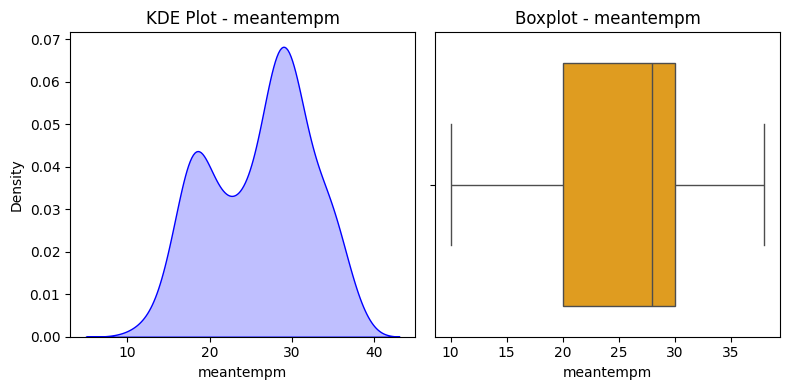

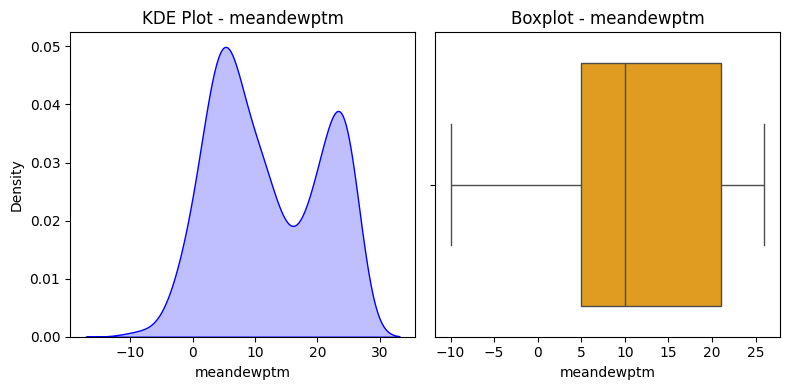

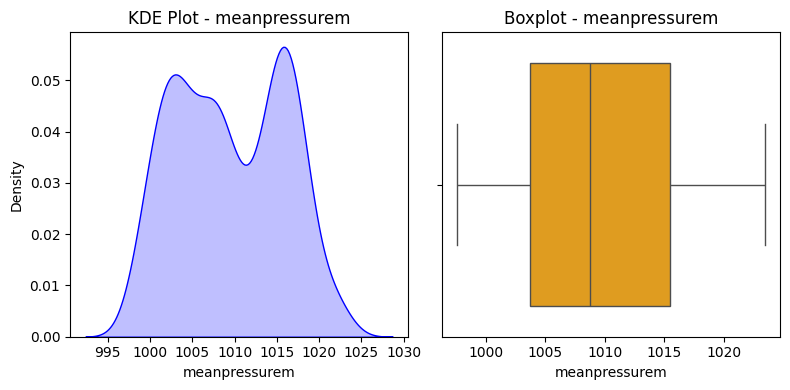

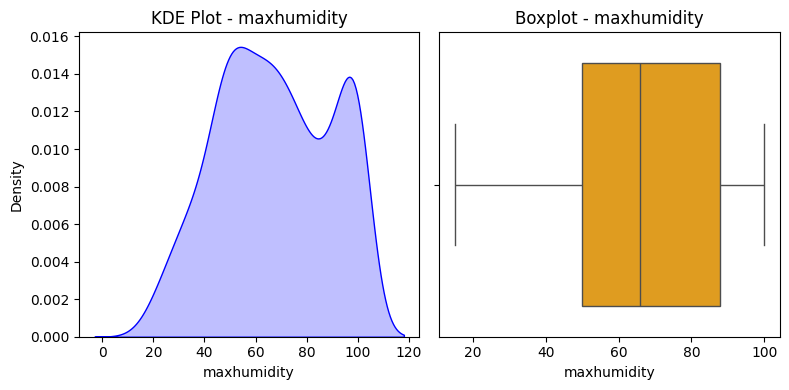

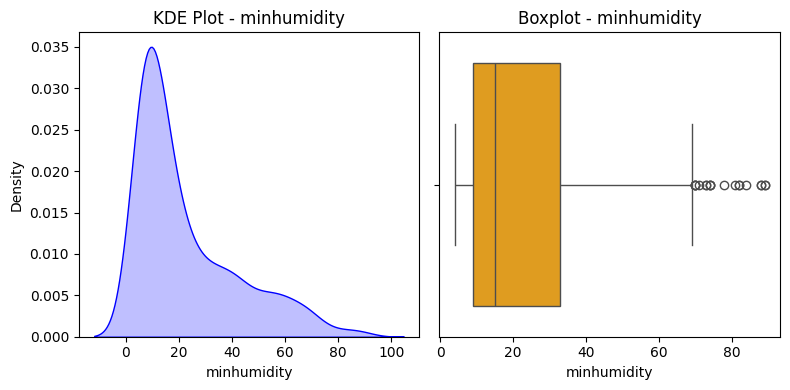

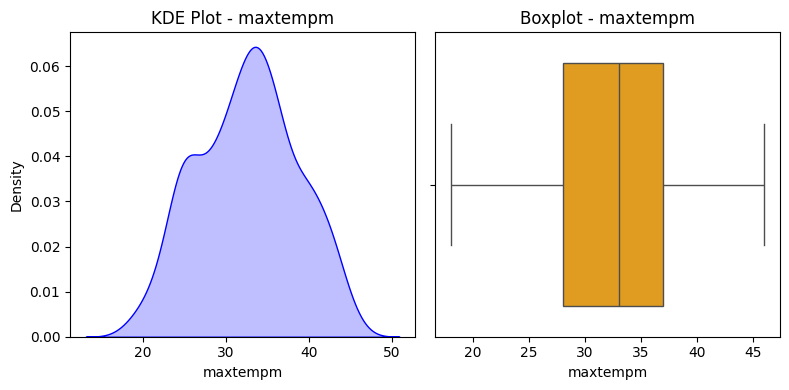

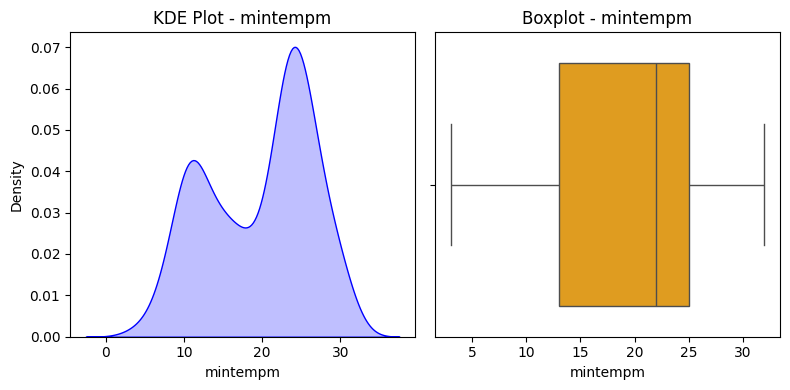

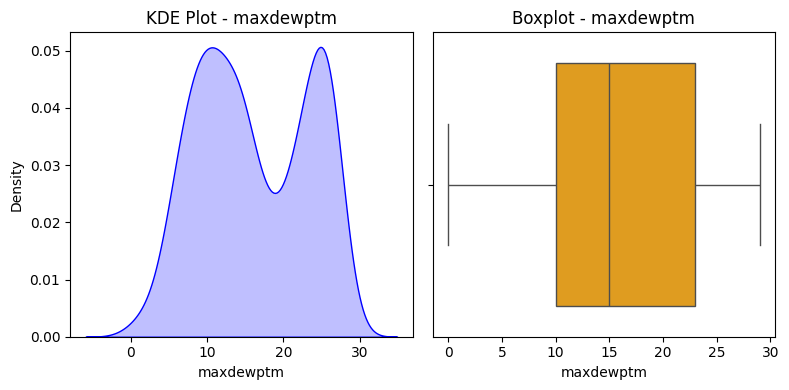

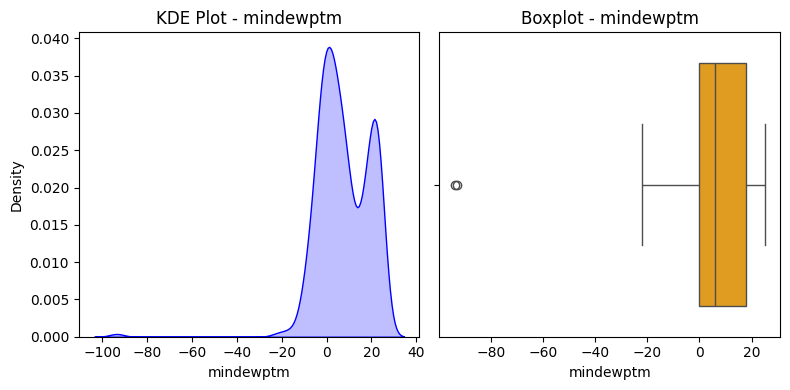

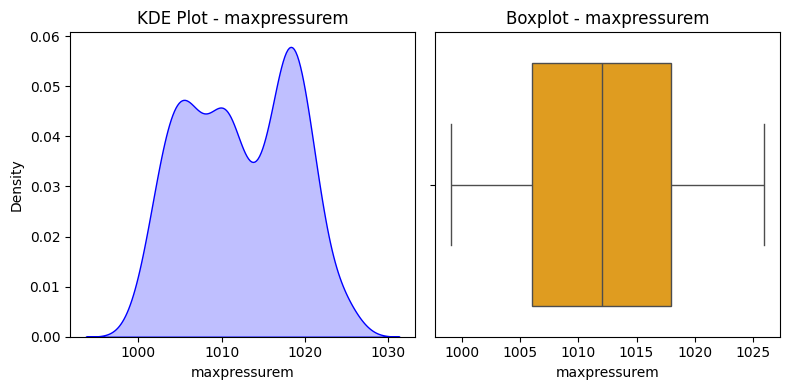

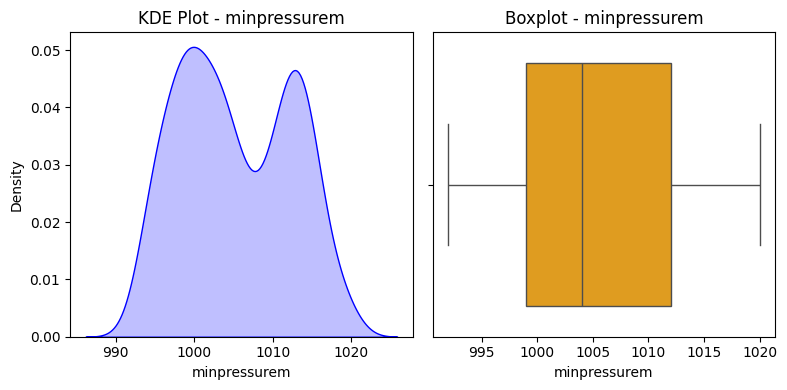

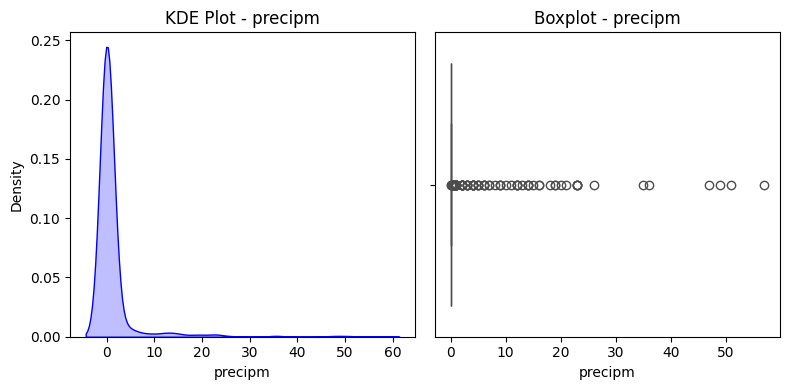

In [20]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # KDE Plot
    sns.kdeplot(df[col].dropna(), ax=axes[0], shade=True, color="blue")
    axes[0].set_title(f"KDE Plot - {col}")

    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[1], color="orange")
    axes[1].set_title(f"Boxplot - {col}")

    plt.tight_layout()
    plt.show()


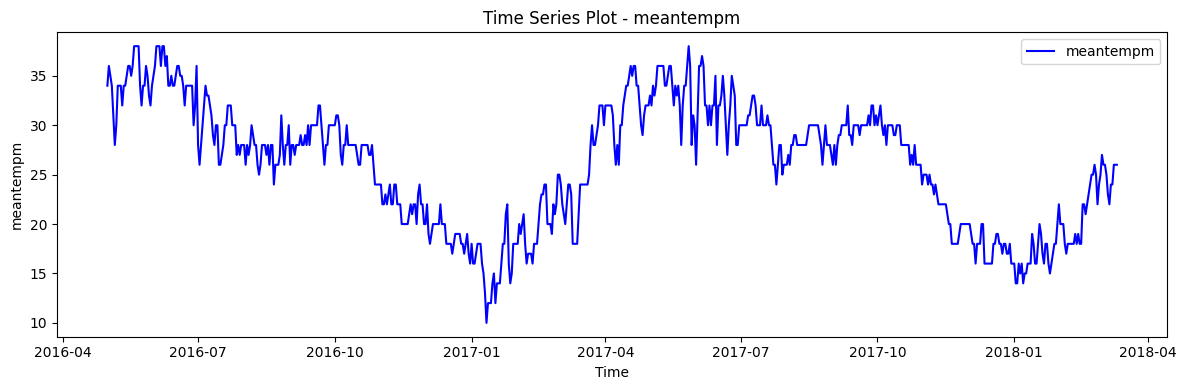

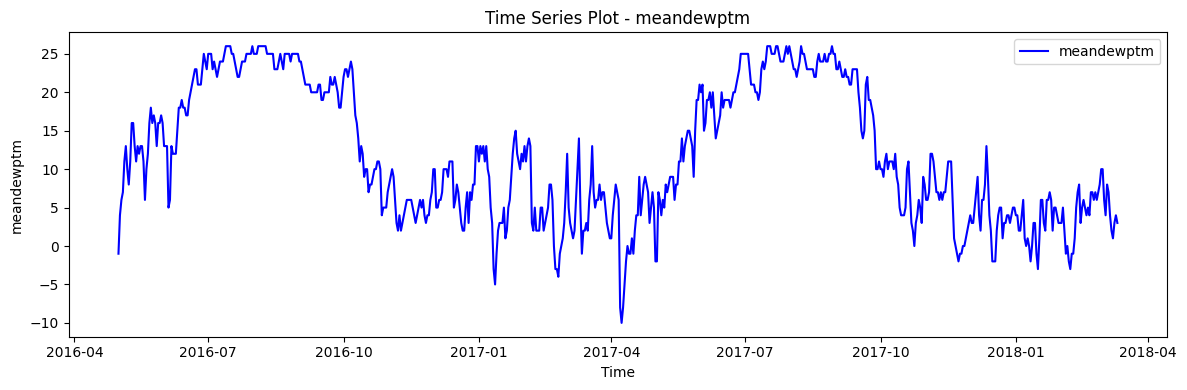

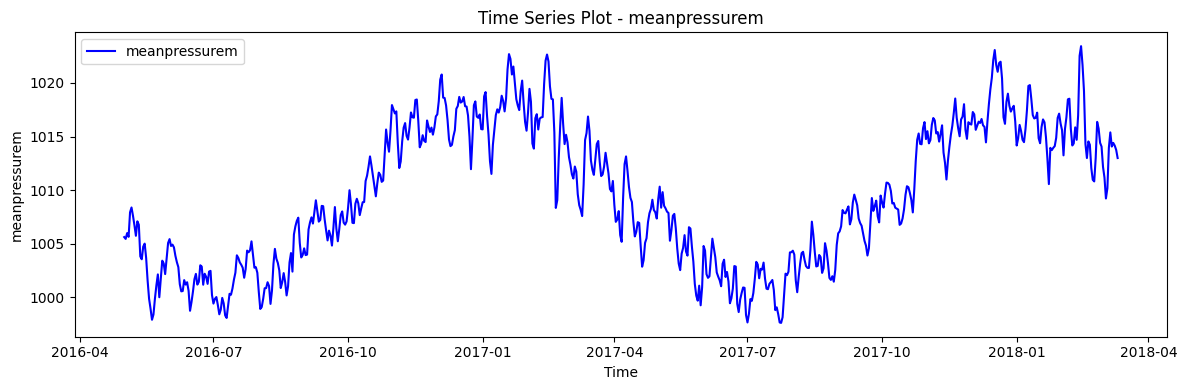

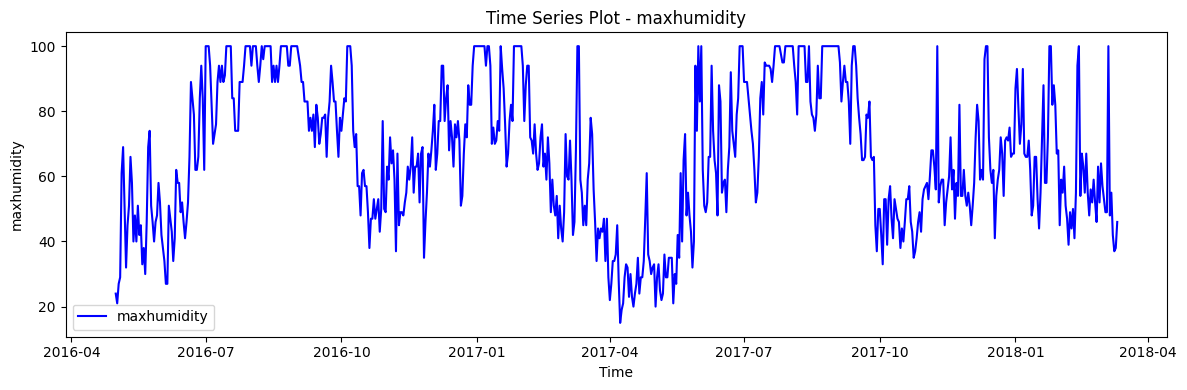

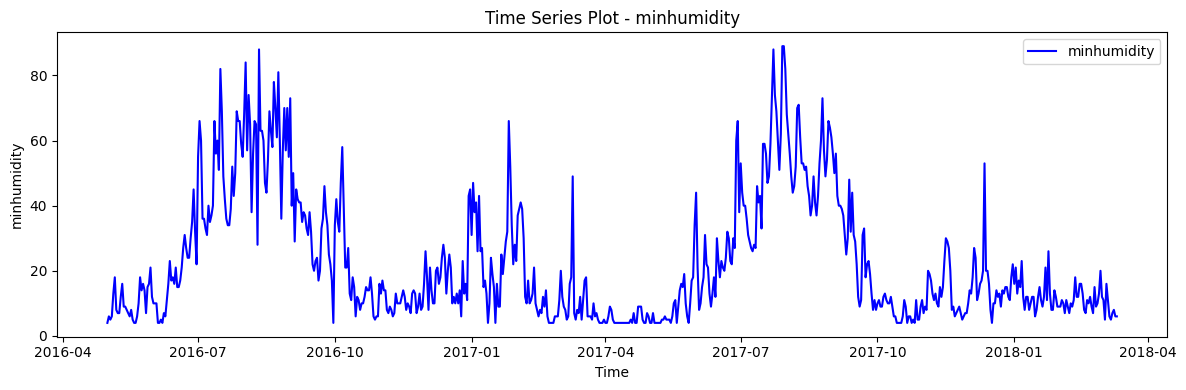

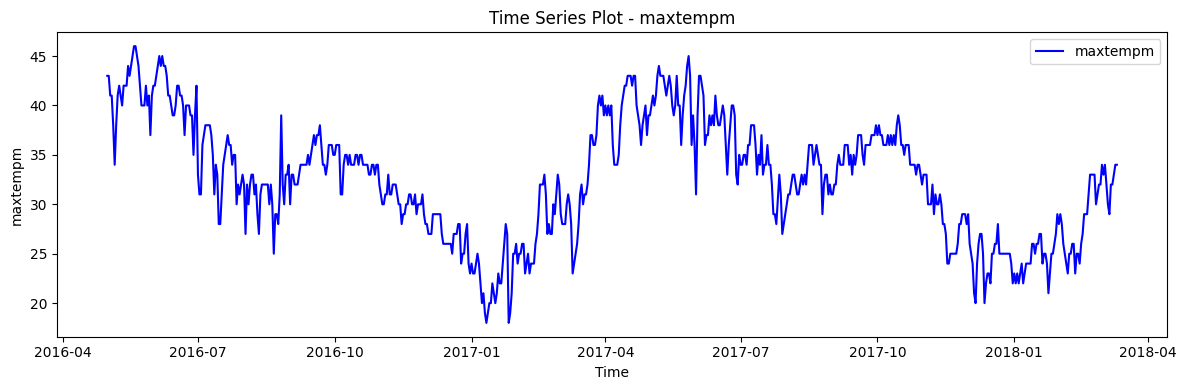

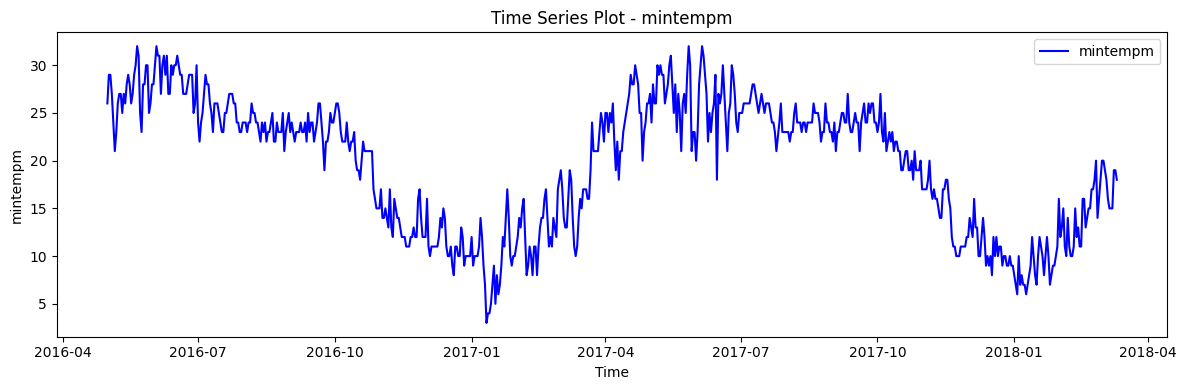

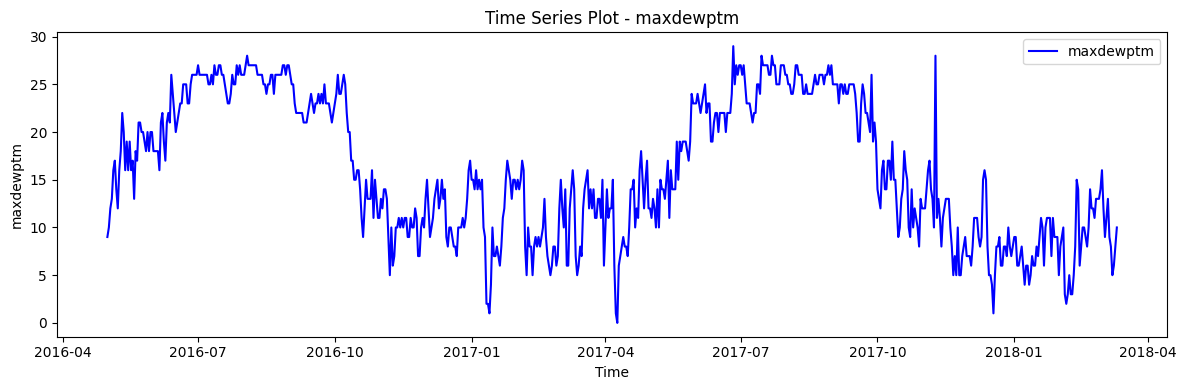

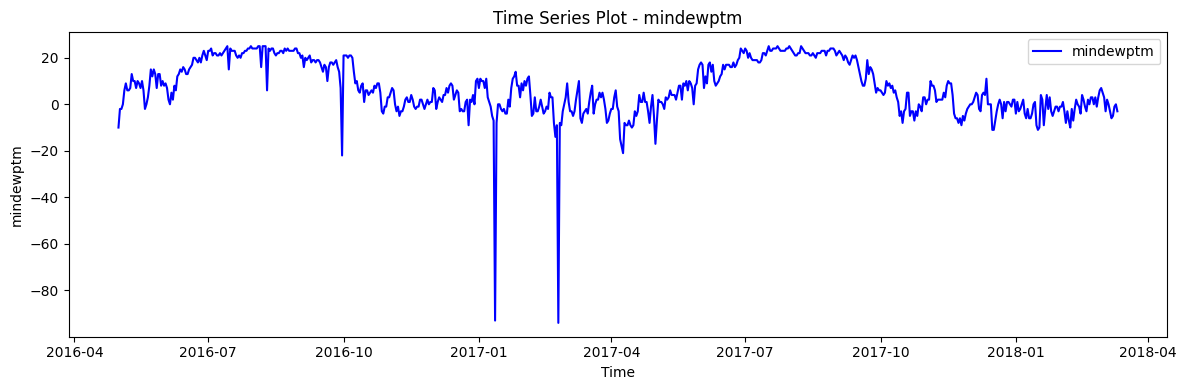

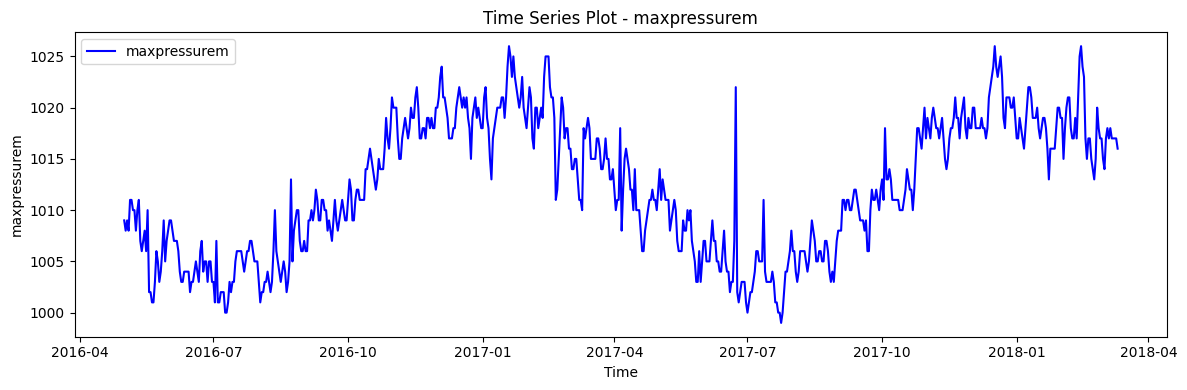

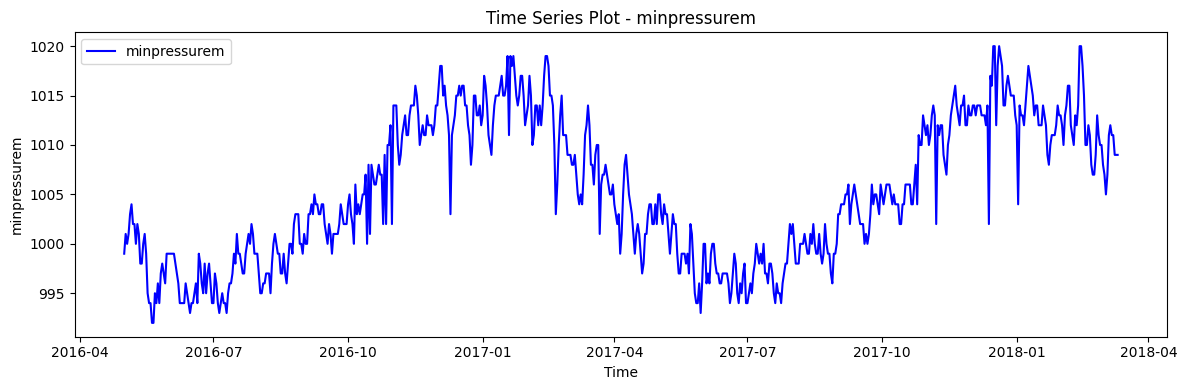

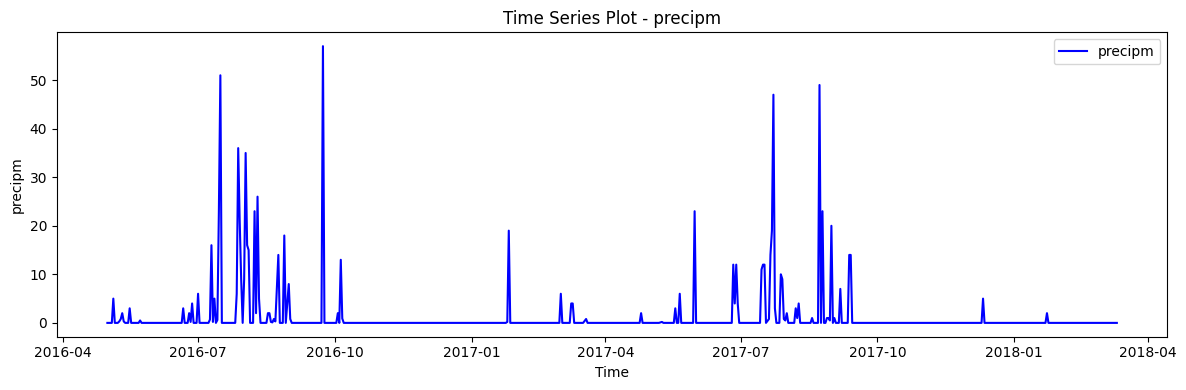

In [13]:
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df[col], label=col, color="blue")
    plt.title(f"Time Series Plot - {col}")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


<Figure size 1200x800 with 0 Axes>

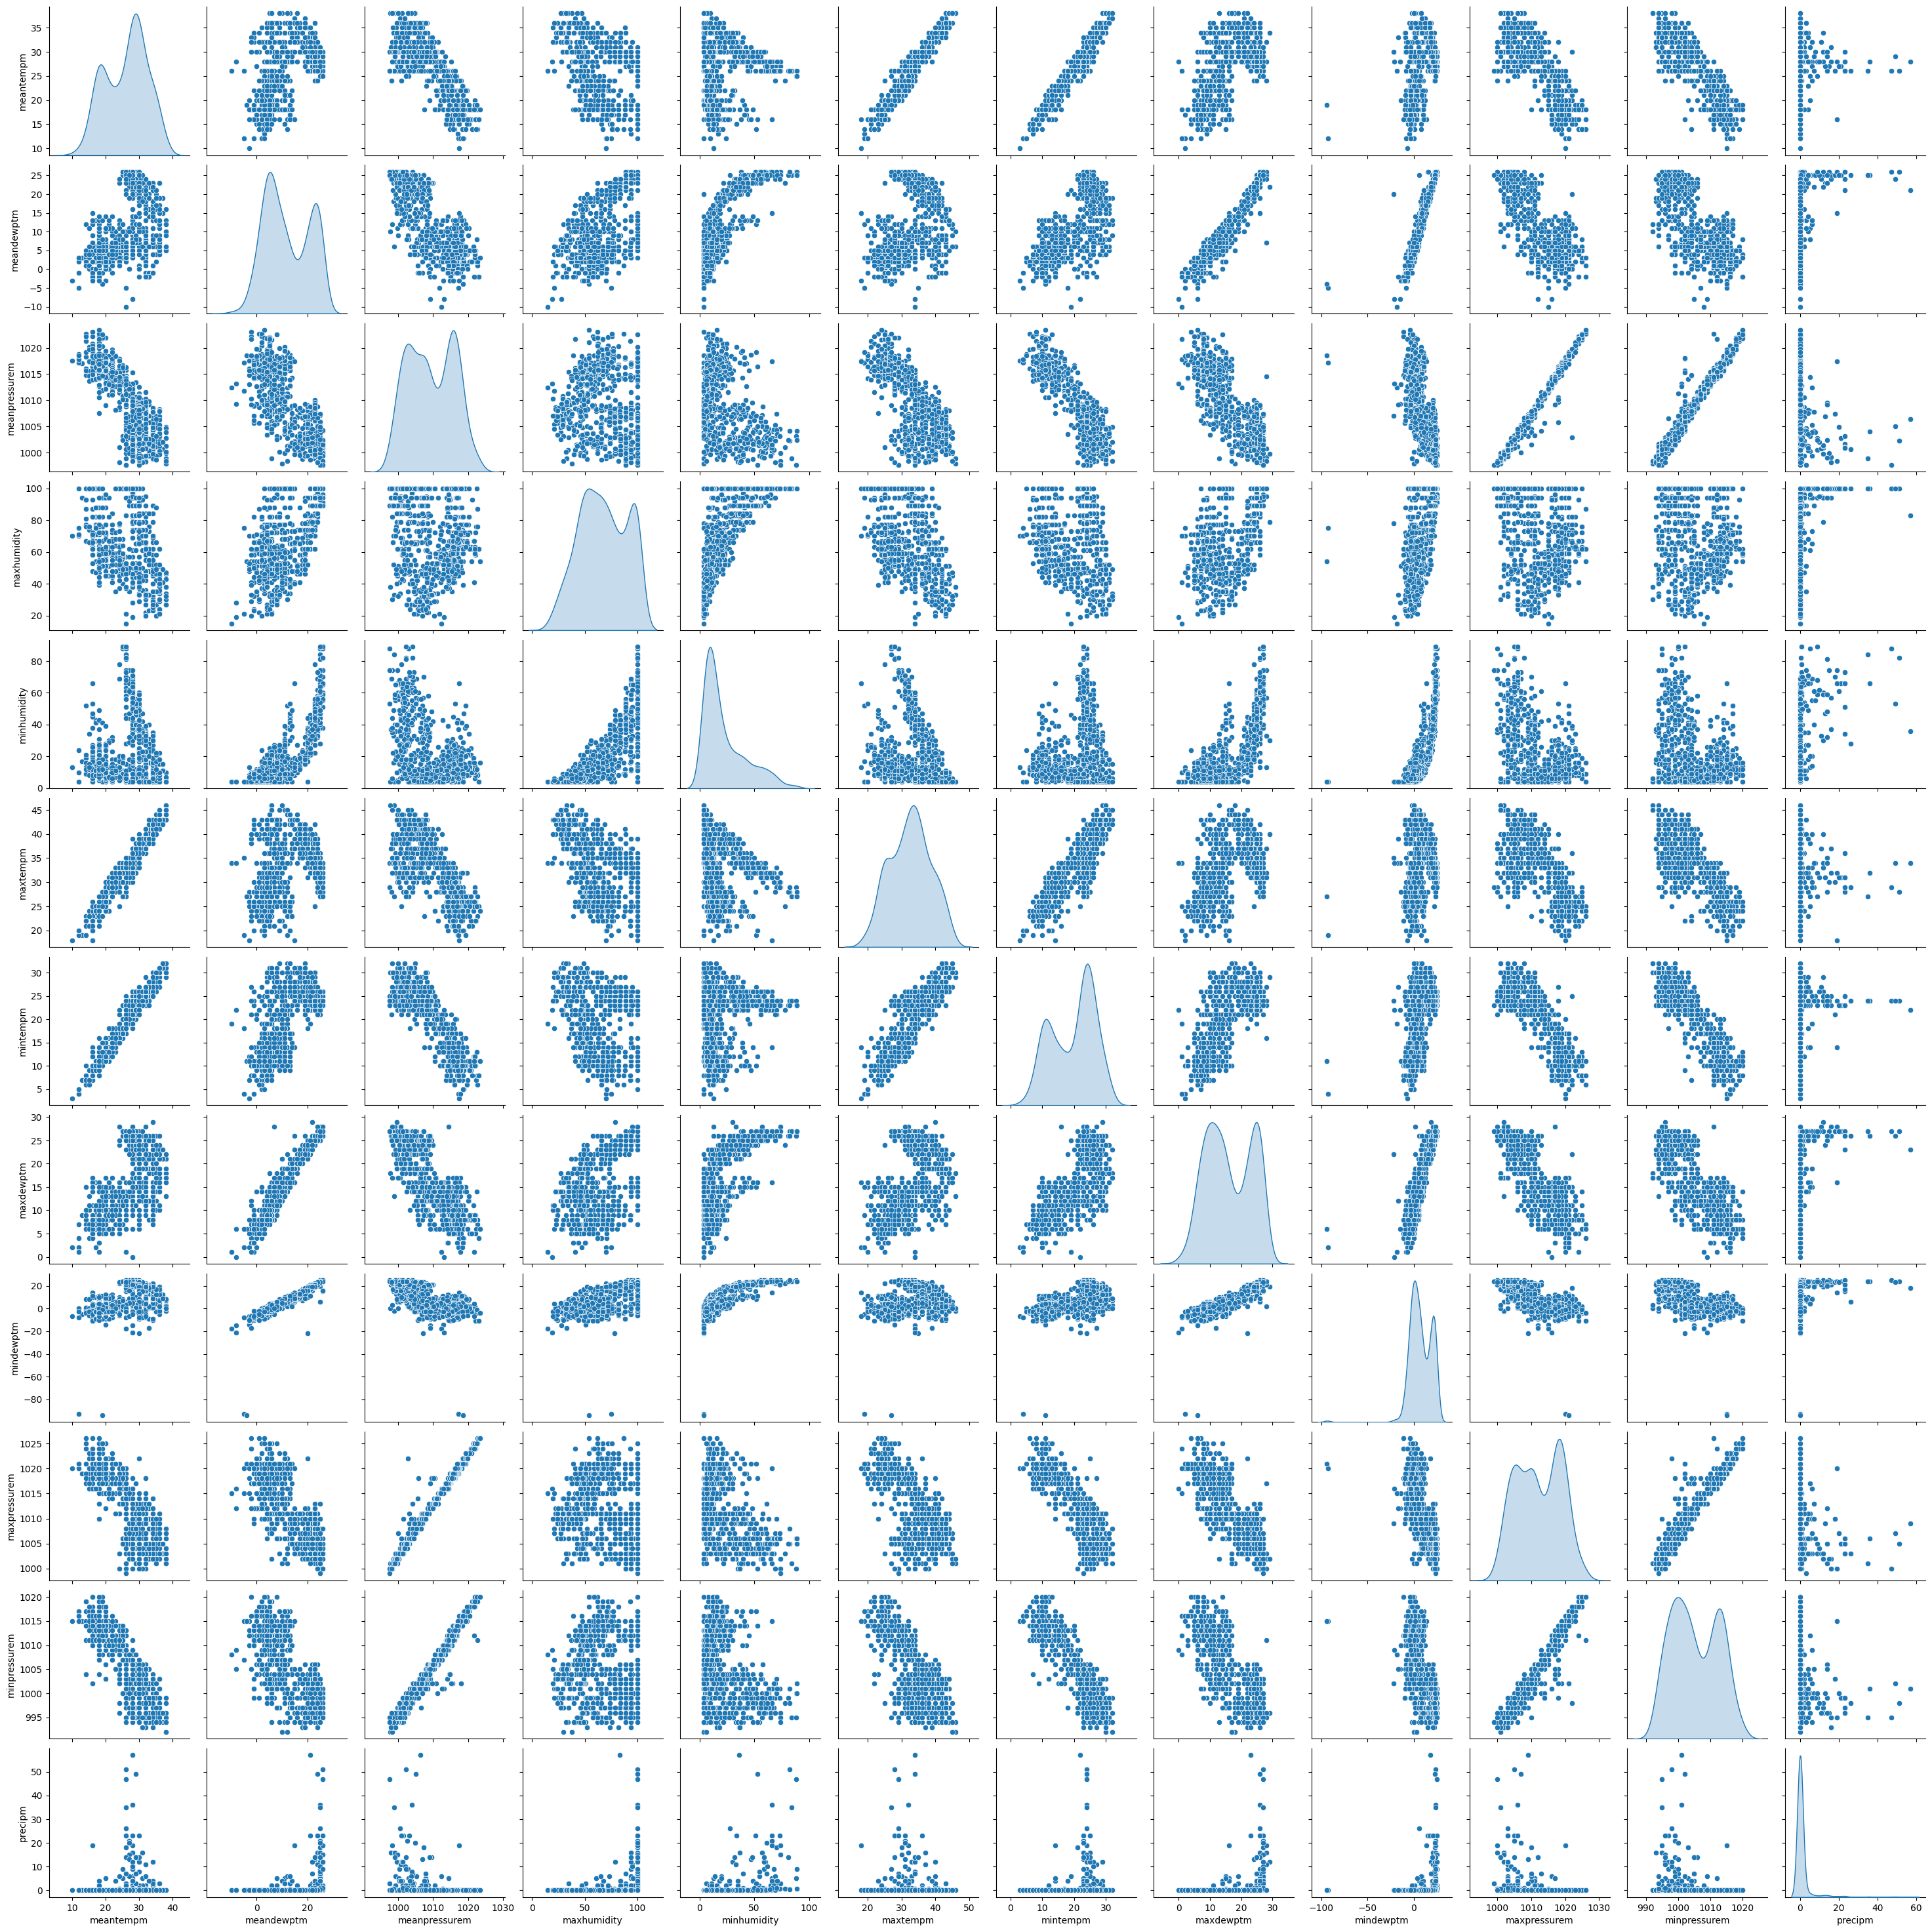

In [15]:
num_cols = df.select_dtypes(include=['number']).columns

# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df[num_cols], diag_kind="kde")
plt.show()


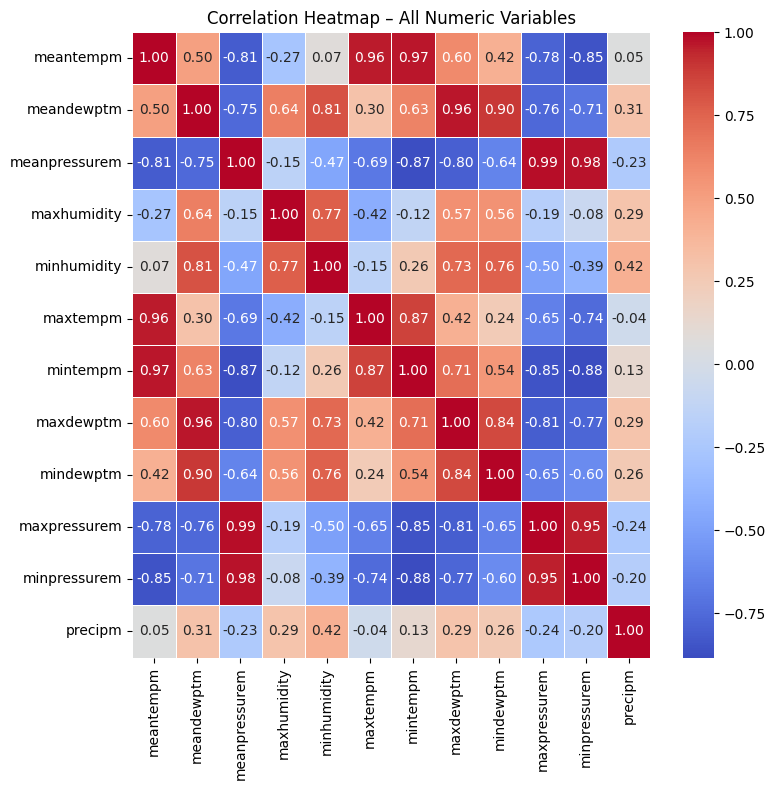

In [19]:
num_cols = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = num_cols.corr()

plt.figure(figsize=(8,8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap – All Numeric Variables")
plt.tight_layout()
plt.show()


# UMAP to visuvalize higher dimentional clusters in 2D


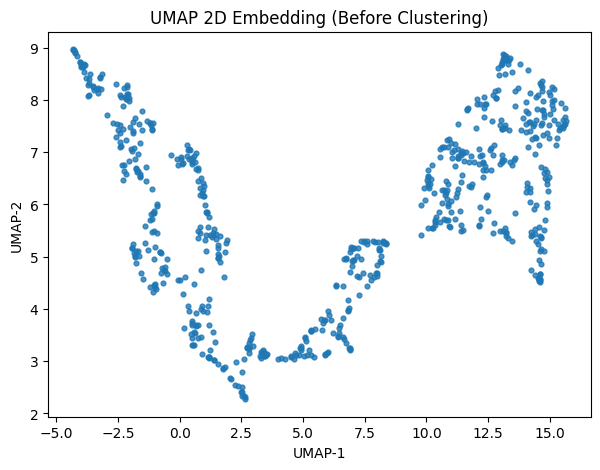

In [15]:
import umap.umap_ as umap


umap_vis = umap.UMAP(
    n_components=2,
    n_neighbors=12,     #15 will maintain local + global sturcture
    min_dist=0.1,
    random_state=42
)

X_umap_2d = umap_vis.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], s=12, alpha=0.8)
plt.title("UMAP 2D Embedding (Before Clustering)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()




# Testing Models for Clustering

## Kmeans

working reasonalbly well with sil score above 0.4, but since clusters are not spherical, we should be test other models for it too

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


WCSS=[]
sil_score=[]

for i in range(2,11):
  kmeans=KMeans(n_clusters=i,max_iter=300,random_state=42)
  kmeans.fit(X_scaled)
  WCSS.append(kmeans.inertia_)
  sil_score.append(silhouette_score(X_scaled,kmeans.labels_))
  print(f"WCSS for {i} clusters: {kmeans.inertia_}")
  print(f"Silhouette score for {i} clusters: {silhouette_score(X_scaled,kmeans.labels_)}")




WCSS for 2 clusters: 4098.476299125739
Silhouette score for 2 clusters: 0.45366389313914013
WCSS for 3 clusters: 2743.873368176187
Silhouette score for 3 clusters: 0.43217161788312575
WCSS for 4 clusters: 2386.3924466236826
Silhouette score for 4 clusters: 0.32951213748683045
WCSS for 5 clusters: 2190.5957603979086
Silhouette score for 5 clusters: 0.30493714291938406
WCSS for 6 clusters: 1754.7894189127799
Silhouette score for 6 clusters: 0.3241503259097598
WCSS for 7 clusters: 1551.1262364975328
Silhouette score for 7 clusters: 0.3056333921193595
WCSS for 8 clusters: 1496.761298993845
Silhouette score for 8 clusters: 0.2405174595177609
WCSS for 9 clusters: 1385.7284726210203
Silhouette score for 9 clusters: 0.2517749669827807
WCSS for 10 clusters: 1229.5021460627427
Silhouette score for 10 clusters: 0.2709385890441805


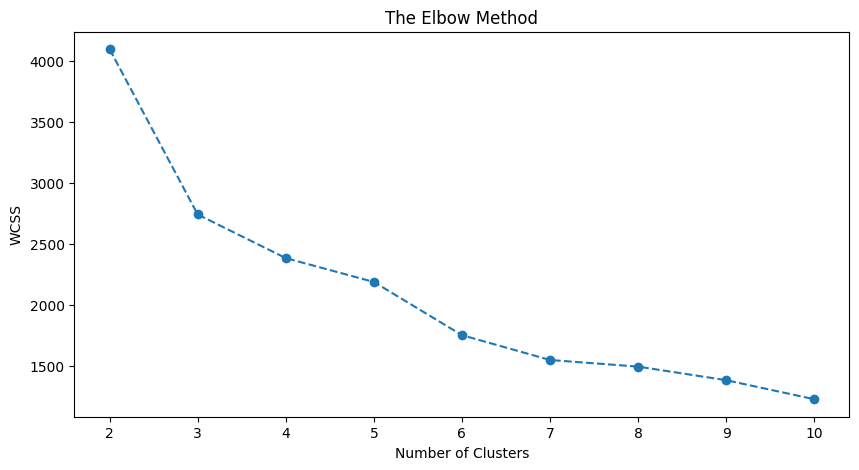

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,11),WCSS,marker='o',linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
#either 3 or 7

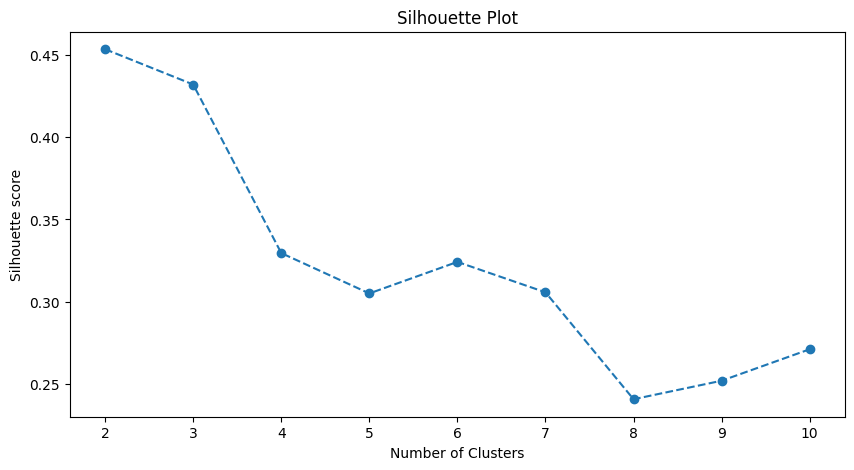

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,11),sil_score,marker='o',linestyle='--')
plt.title('Silhouette Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.show()
#either 2, 3 or 6

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.432


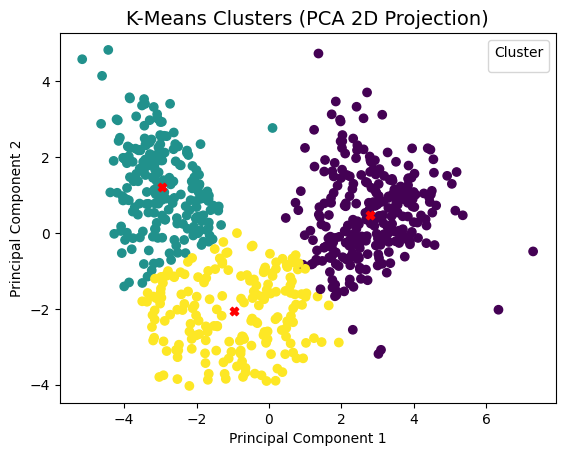

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

centroids_2d = pca.transform(kmeans.cluster_centers_)


scatter = plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=kmeans_labels)

# Plot cluster centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='X', color="red")

plt.title('K-Means Clusters (PCA 2D Projection)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


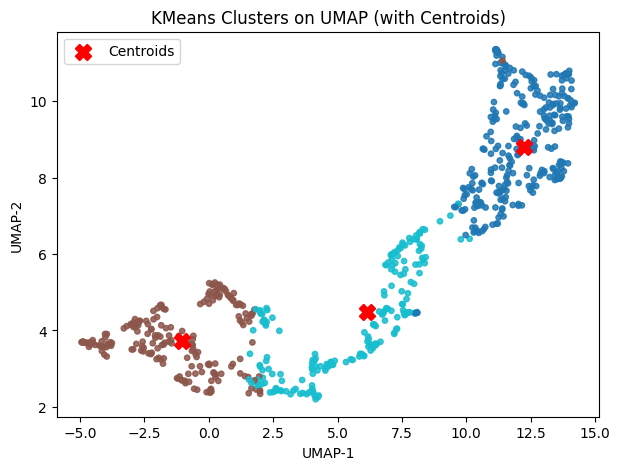

In [ ]:
from sklearn.cluster import KMeans
import umap.umap_ as umap
import matplotlib.pyplot as plt



centroids_2d = umap_vis.transform(kmeans.cluster_centers_)
plt.figure(figsize=(7,5))

# scatter points
plt.scatter(
    X_umap_2d[:, 0],
    X_umap_2d[:, 1],
    c=kmeans_labels,
    cmap="tab10",
    s=15,
    alpha=0.85
)

plt.scatter(
    centroids_2d[:, 0],
    centroids_2d[:, 1],
    c="red",
    s=120,
    marker="X",
    linewidth=1.5,
    label="Centroids"
)

plt.title("KMeans Clusters on UMAP (with Centroids)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend()

plt.show()


## DBSCAN
since the entire manifold is connected DBSCAN may face issue in segregation of clusters and may consider it one giant cluster instead

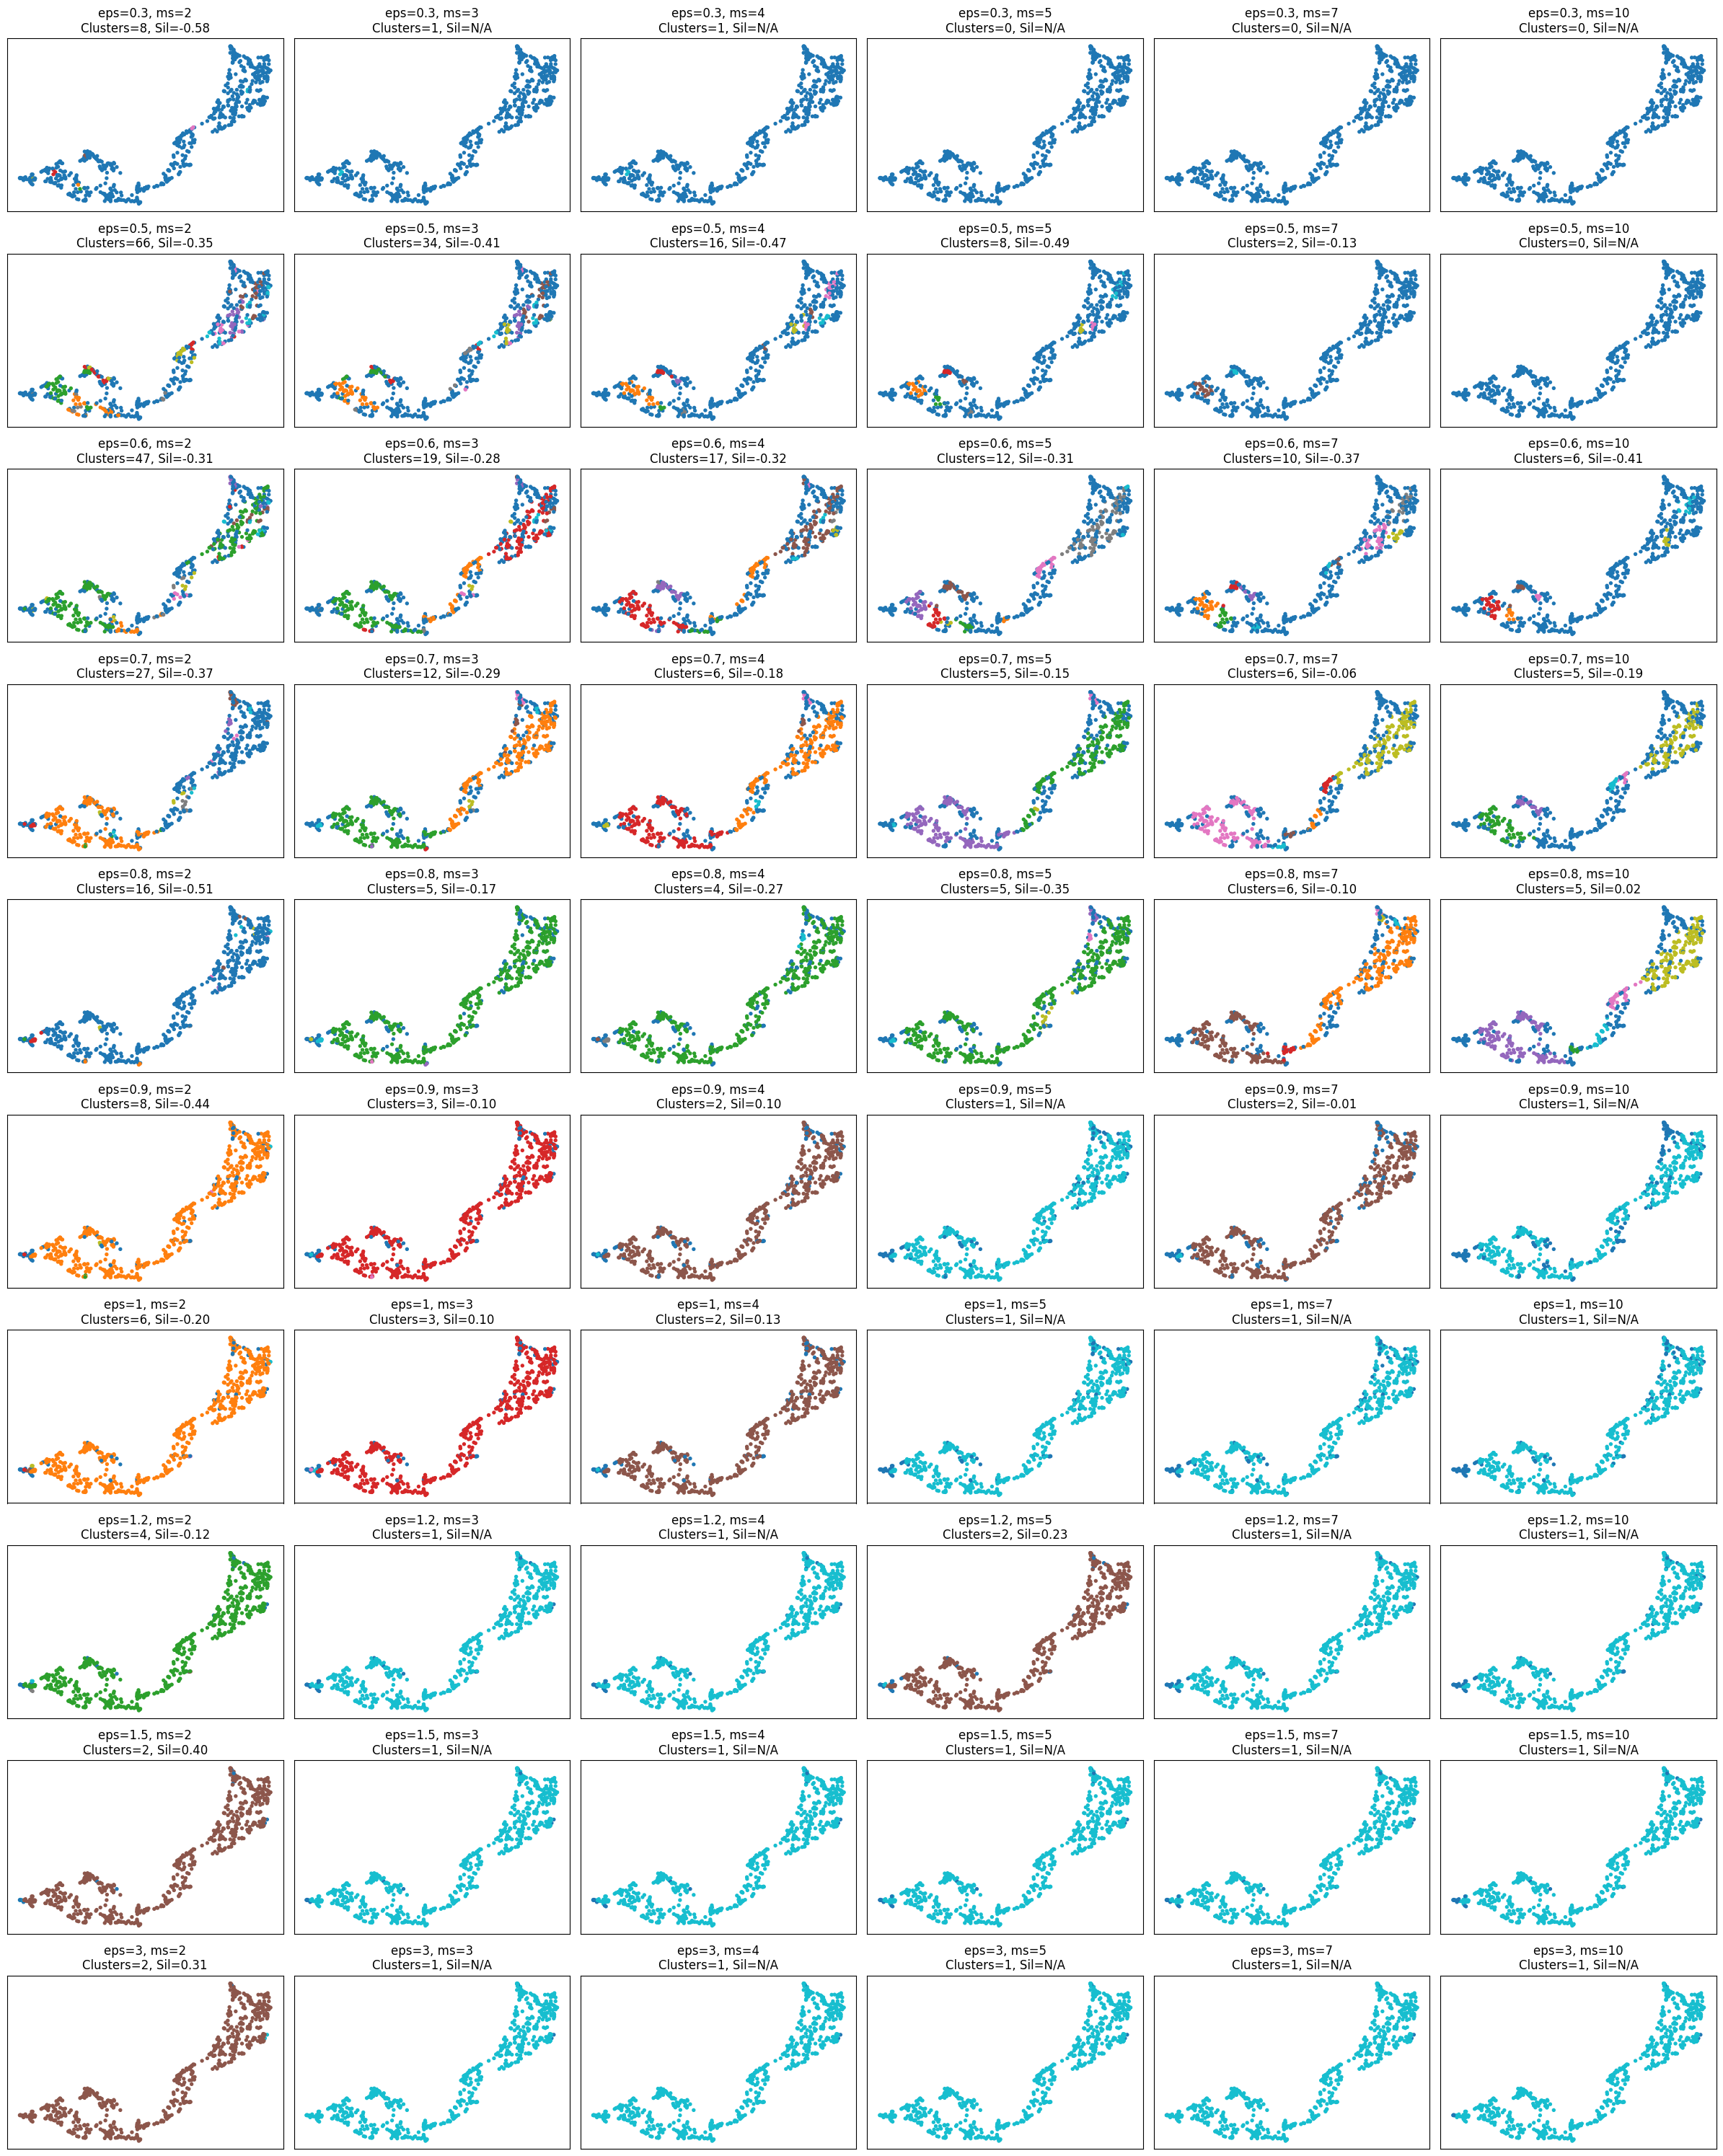

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.5, 3]
min_samples_values = [2, 3, 4, 5, 7, 10]

rows = len(eps_values)
cols = len(min_samples_values)

plt.figure(figsize=(4 * cols, 3 * rows))
plot_index = 1

for eps in eps_values:
    for ms in min_samples_values:

        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(X_scaled)

        # Number of clusters (exclude noise = -1)
        unique_clusters = np.unique(labels)
        n_clusters = len(unique_clusters[unique_clusters != -1])

        # Silhouette score  valid when n_clusters >= 2
        if n_clusters >= 2:
            sil = silhouette_score(X_scaled, labels)
            sil_text = f"Sil={sil:.2f}"
        else:
            sil_text = "Sil=N/A"

        plt.subplot(rows, cols, plot_index)
        plot_index += 1

        plt.scatter(
            X_umap_2d[:, 0],
            X_umap_2d[:, 1],
            c=labels,
            cmap="tab10",
            s=8
        )

        plt.title(f"eps={eps}, ms={ms}\nClusters={n_clusters}, {sil_text}")
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

eps_values = [0.05, 0.15, 0.3, 0.5, 0.8, 1, 1.2, 1.5, 3]
min_samples_values = [3, 5, 7, 10]

results = []   # to store [eps, ms, clusters, silhouette]

for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(X_scaled)

        # Count clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)      #as in dBscan the outliers are given - label

        # Silhouette only meaningful if clusters >= 2
        if n_clusters >= 2:
            sil = silhouette_score(X_scaled, labels)
        else:
            sil = -1   #meaningless

        results.append([eps, ms, n_clusters, sil])

# Sort by silhouette score so x[3], descending order
results_sorted = sorted(results, key=lambda x: x[3], reverse=True)

# Print best
print("Top results (best silhouette scores):")
for r in results_sorted[:10]:
    print(f"eps={r[0]}, min_samples={r[1]}, clusters={r[2]}, silhouette={r[3]:.3f}")


Top results (best silhouette scores):
eps=1.2, min_samples=5, clusters=2, silhouette=0.235
eps=1, min_samples=3, clusters=3, silhouette=0.104
eps=0.8, min_samples=10, clusters=5, silhouette=0.015
eps=0.8, min_samples=7, clusters=6, silhouette=-0.096
eps=0.5, min_samples=7, clusters=2, silhouette=-0.126
eps=0.8, min_samples=3, clusters=5, silhouette=-0.166
eps=0.8, min_samples=5, clusters=5, silhouette=-0.353
eps=0.5, min_samples=3, clusters=34, silhouette=-0.409
eps=0.5, min_samples=5, clusters=8, silhouette=-0.486
eps=0.05, min_samples=3, clusters=0, silhouette=-1.000


## GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

k_values = range(2, 15)
cov_types = ["full", "tied", "diag", "spherical"]

results = []

for k in k_values:
    for cov in cov_types:

        gmm = GaussianMixture(
            n_components=k,
            covariance_type=cov,
            random_state=42
        )

        labels = gmm.fit_predict(X_scaled)

        n_clusters = len(np.unique(labels))

        # silhouette only valid if >=2 clusters
        if n_clusters >= 2:
            sil = silhouette_score(X_scaled, labels)
        else:
            sil = np.nan

        results.append([k, cov, sil])


In [ ]:
df_gmm = pd.DataFrame(
    results,
    columns=["n_components", "covariance_type", "silhouette"]
)




df_sorted = df_gmm.sort_values("silhouette", ascending=False)
print(df_sorted)
best_row = df_sorted.iloc[0]

best_k = int(best_row["n_components"])
best_cov = best_row["covariance_type"]
best_sil = best_row["silhouette"]

print("Best GMM Model:")
print(f"Clusters = {best_k}")
print(f"Covariance = {best_cov}")
print(f"Silhouette = {best_sil:.4f}")


    n_components covariance_type  silhouette
1              2            tied    0.446065
3              2       spherical    0.432820
7              3       spherical    0.429346
5              3            tied    0.423933
2              2            diag    0.403966
6              3            diag    0.357108
9              4            tied    0.344859
10             4            diag    0.337109
11             4       spherical    0.329662
19             6       spherical    0.313394
15             5       spherical    0.298167
23             7       spherical    0.291454
27             8       spherical    0.279510
16             6            full    0.266503
14             5            diag    0.260541
39            11       spherical    0.260480
18             6            diag    0.258362
17             6            tied    0.257142
35            10       spherical    0.251769
25             8            tied    0.250071
21             7            tied    0.249943
26        

In [ ]:
best_gmm = GaussianMixture(
    n_components=best_k,
    covariance_type=best_cov,
    random_state=42)

print()
best_labels = best_gmm.fit_predict(X_scaled)


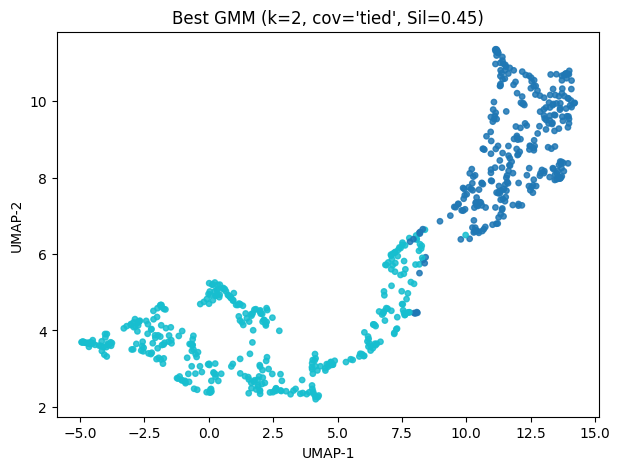

In [ ]:
plt.figure(figsize=(7,5))

plt.scatter(
    X_umap_2d[:, 0],
    X_umap_2d[:, 1],
    c=best_labels,
    cmap="tab10",
    s=15,
    alpha=0.85
)

plt.title(f"Best GMM (k={best_k}, cov='{best_cov}', Sil={best_sil:.2f})")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()


Silhouette Score 0.429346170909855


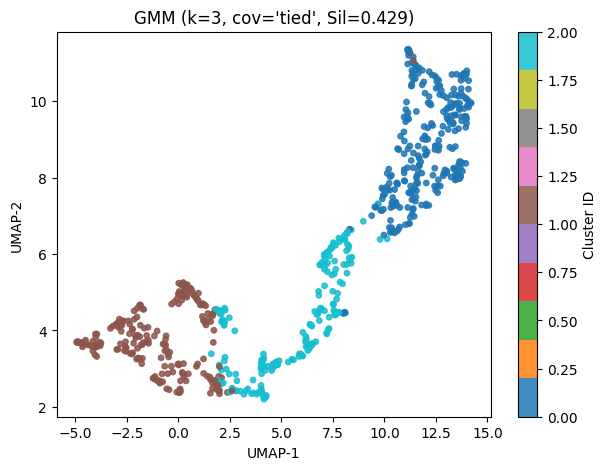

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


# Fit the model
gmm = GaussianMixture(
    n_components=3,
    covariance_type="spherical",
    random_state=42
)

labels = gmm.fit_predict(X_scaled)

# Compute silhouette
if len(np.unique(labels)) > 1:
    sil = silhouette_score(X_scaled, labels)
else:
    sil = None

print(f"Silhouette Score {sil}")

# ---- Plot ----
plt.figure(figsize=(7,5))
plt.scatter(
    X_umap_2d[:, 0],
    X_umap_2d[:, 1],
    c=labels,
    cmap="tab10",
    s=15,
    alpha=0.85
)

plt.title(f"GMM (k=3, cov='tied', Sil={sil:.3f})")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(label="Cluster ID")
plt.show()


# -----------------------------------------------------------------------------------

# Time Series Analysis

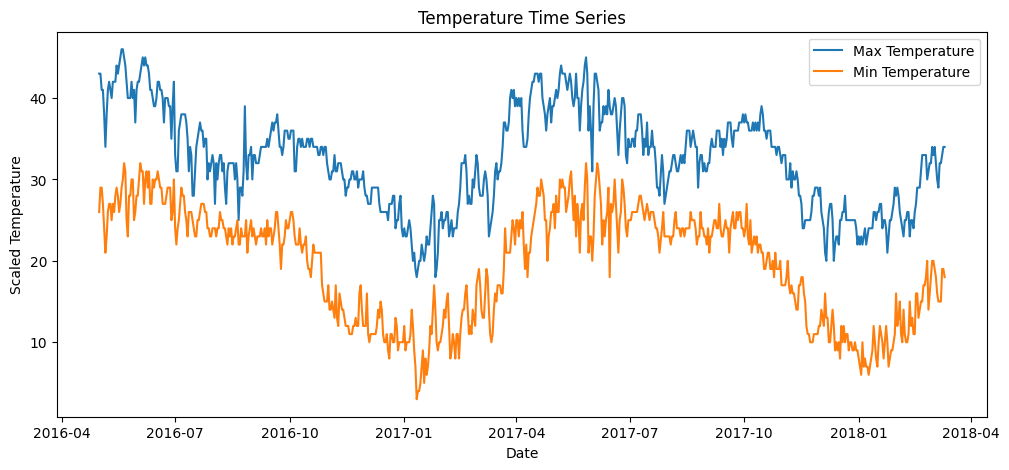

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['maxtempm'], label='Max Temperature')
plt.plot(df['mintempm'], label='Min Temperature')
plt.title("Temperature Time Series")
plt.xlabel("Date")
plt.ylabel("Scaled Temperature")
plt.legend()
plt.show()

#very heavy seasonality, and it repeats every year so D = 1

## Finding Trend, season and noise in the series

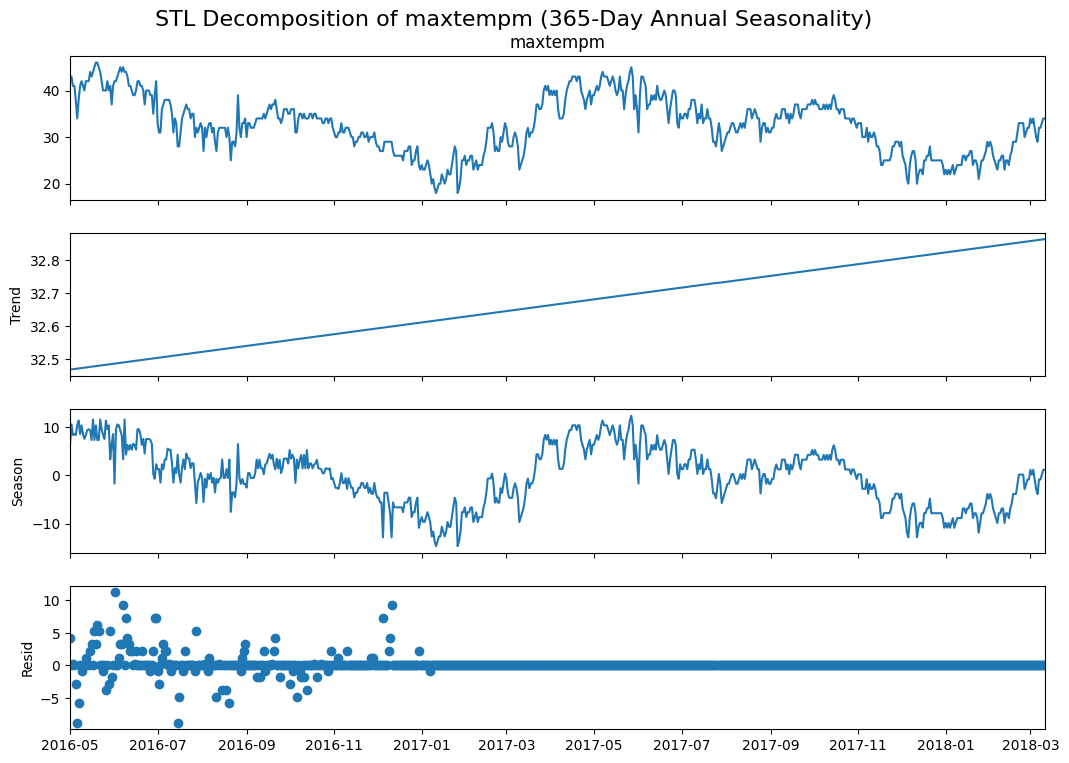

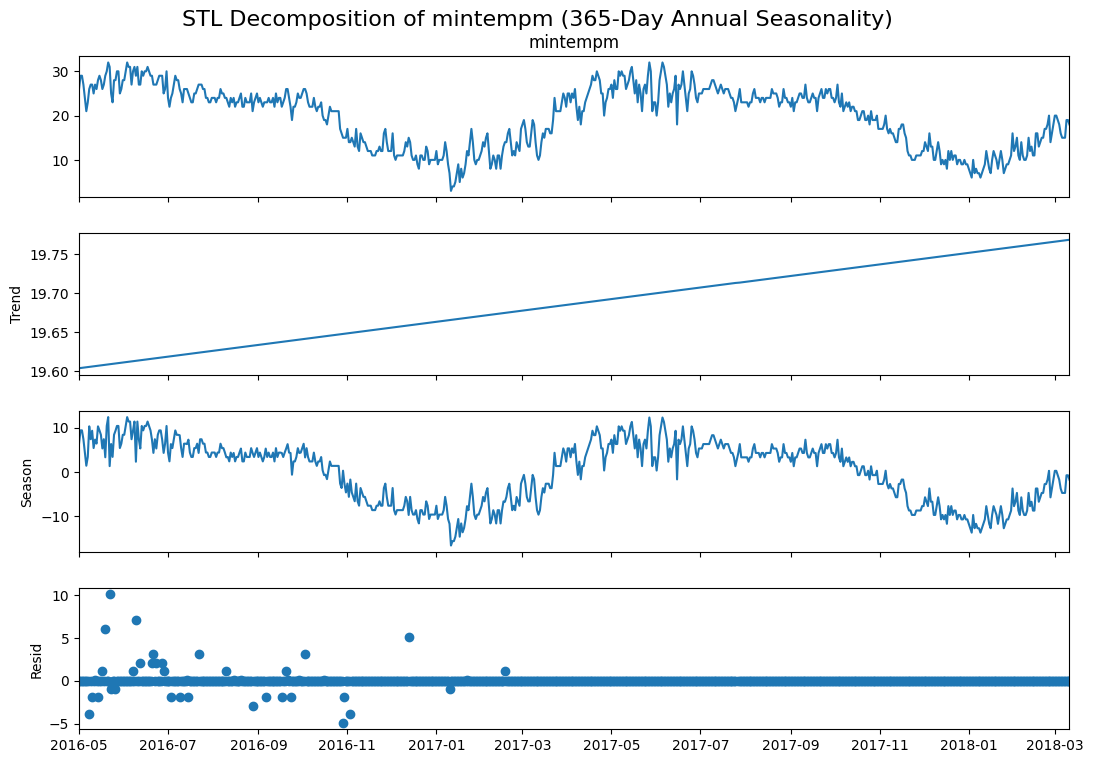

In [14]:
from statsmodels.tsa.seasonal import STL        #turns out that seasonal_decompose is causing issues with the period due to data being for less than 2 years
import matplotlib.pyplot as plt

targets = ["maxtempm", "mintempm"]

for col in targets:
    series = df[col]

    stl = STL(series, period=365, robust=True)
    result = stl.fit()

    fig = result.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle(f"STL Decomposition of {col} (365-Day Annual Seasonality)", fontsize=16)
    plt.show()


## Train Test split

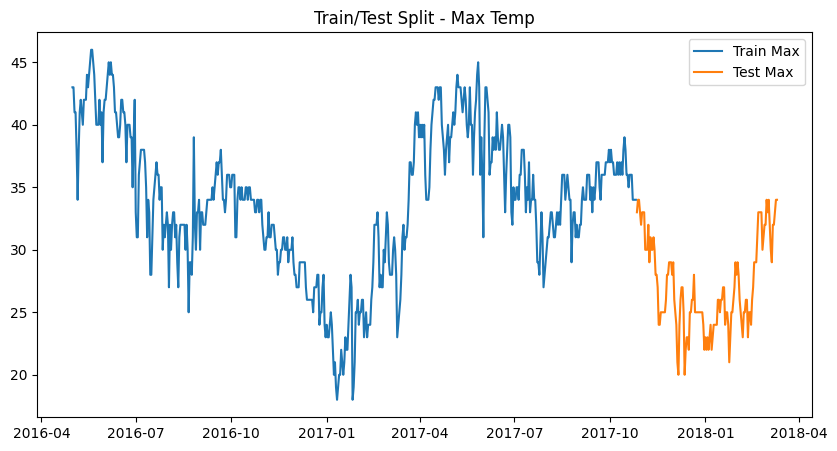

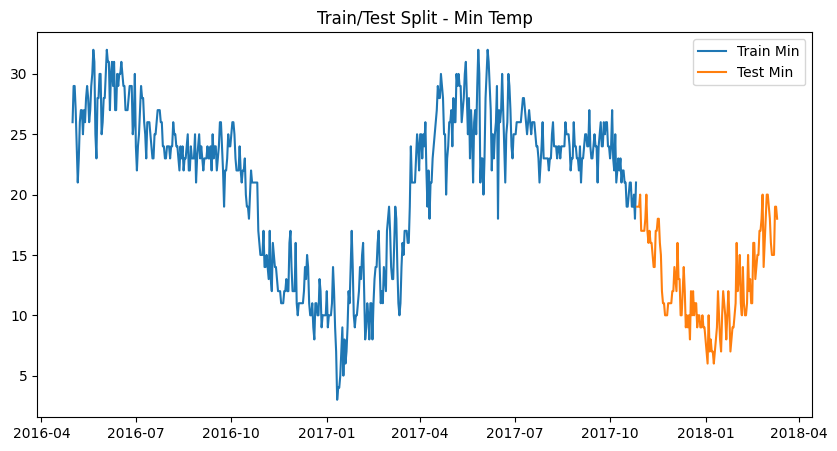

In [15]:
# 80% train, 20% test
train_size = int(len(df) * 0.8)

train = df.iloc[:train_size][['maxtempm', 'mintempm']]
test  = df.iloc[train_size:][['maxtempm', 'mintempm']]

plt.figure(figsize=(10,5))
plt.plot(train['maxtempm'], label='Train Max')
plt.plot(test['maxtempm'], label='Test Max')
plt.title("Train/Test Split - Max Temp")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train['mintempm'], label='Train Min')
plt.plot(test['mintempm'], label='Test Min')
plt.title("Train/Test Split - Min Temp")
plt.legend()
plt.show()


## AD Fuller test to check for stationarity of the series

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=""):
    print(f"ADF Test for {title}")
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations']
    for value, label in zip(result[:4], labels):
        print(f"{label} : {value}")
    print("Critical Values:")
    for key, val in result[4].items():
        print(f"   {key}: {val}")
    if result[1] <= 0.05:
        print("Series is STATIONARY")
    else:
        print("Series is NON-STATIONARY")

# Run tests
adf_test(df['maxtempm'], 'Max Temperature')
print("-"*50)
adf_test(df['mintempm'], 'Min Temperature')


ADF Test for Max Temperature
ADF Statistic : -2.268615517192058
p-value : 0.18228991991063775
# Lags Used : 8
# Observations : 670
Critical Values:
   1%: -3.4401478069875613
   5%: -2.8658634456698464
   10%: -2.5690723769213633
Series is NON-STATIONARY
--------------------------------------------------
ADF Test for Min Temperature
ADF Statistic : -1.804900995641421
p-value : 0.37803121443816257
# Lags Used : 5
# Observations : 673
Critical Values:
   1%: -3.4401039634870623
   5%: -2.8658441302164346
   10%: -2.569062085956077
Series is NON-STATIONARY


## ARIMA Model

In [29]:
from pmdarima import auto_arima

auto_model_max = auto_arima(
    df['maxtempm'],
    seasonal=True,
    m=12,                 # yearly seasonality approximated as 12 months
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(auto_model_max.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2705.476, Time=6.39 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2742.235, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2743.445, Time=0.63 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2742.269, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2740.271, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2703.474, Time=9.15 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2701.477, Time=3.03 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2703.474, Time=7.42 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2700.381, Time=1.34 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2702.353, Time=2.11 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2702.353, Time=1.99 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2704.349, Time=3.39 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2720.035, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2704.164, Time=2.07 sec
 ARIMA(1,1,3)(0,0,0

In [30]:
auto_model_min = auto_arima(
    df['mintempm'],
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(auto_model_min.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2813.635, Time=2.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2889.616, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2871.780, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2861.006, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2887.639, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2811.738, Time=1.08 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2809.897, Time=0.74 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2811.725, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2807.754, Time=0.69 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2809.551, Time=3.94 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2809.565, Time=2.11 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2811.458, Time=2.72 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2821.761, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2807.237, Time=0.37 sec
 ARIMA(1,1,1)(1,0,0

MAE: 7.7906
Accuracy: 0.7123


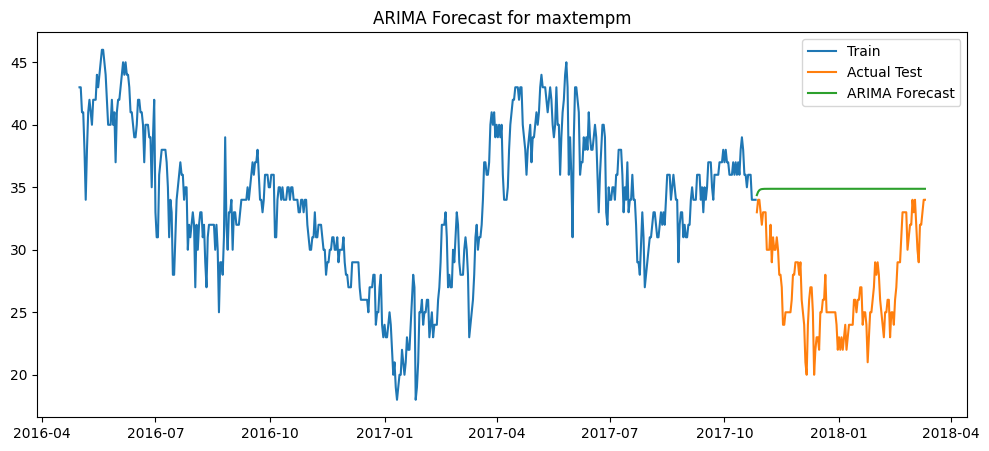

MAE: 7.6785
Accuracy: 0.3960


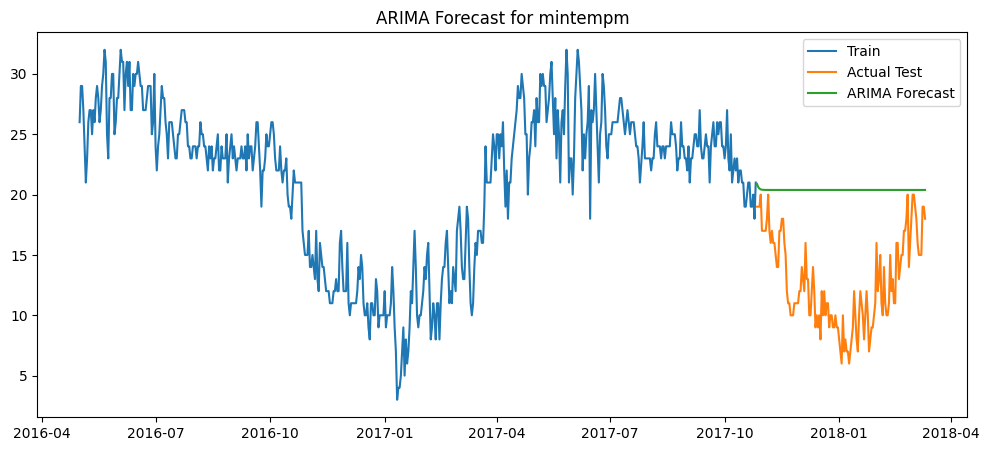

In [32]:
from statsmodels.tsa.arima.model import ARIMA     #will fail due tos easonality
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def run_arima(target_col):


    y_train = train[target_col]
    y_test  = test[target_col]

    # ARIMA(2,1,2) is a strong baseline for seasonal-ish data
    model = ARIMA(y_train, order=(2,1,1))
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(y_test))

    # Evaluate
    mae = mean_absolute_error(y_test, forecast)
    acc = 1 - mae / y_test.mean()

    print(f"MAE: {mae:.4f}")
    print(f"Accuracy: {acc:.4f}")

    # Plot actual vs forecast
    plt.figure(figsize=(12,5))
    plt.plot(y_train.index, y_train, label="Train")
    plt.plot(y_test.index, y_test, label="Actual Test")
    plt.plot(y_test.index, forecast, label="ARIMA Forecast")
    plt.title(f"ARIMA Forecast for {target_col}")
    plt.legend()
    plt.show()

    return mae, acc, forecast

# Run ARIMA for both
arima_mae_max, arima_acc_max, arima_fore_max = run_arima("maxtempm")
arima_mae_min, arima_acc_min, arima_fore_min = run_arima("mintempm")


## SARIMAX MODEL

In [33]:
exog_vars = [
    "meantempm","meandewptm","meanpressurem",
    "maxhumidity","minhumidity",
    "maxdewptm","mindewptm",
    "maxpressurem","minpressurem",
    "precipm"
]

train_exog = df[exog_vars].iloc[:train_size]
test_exog  = df[exog_vars].iloc[train_size:]


In [35]:
y_train = train["maxtempm"]
X_train = train_exog

auto_sarimax_max = auto_arima(
    y_train,
    X=X_train,
    seasonal=True,
    m=12,
    trace=True,
    suppress_warnings=True,
    error_action="ignore",
    stepwise=True
)

print(auto_sarimax_max.summary())



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1480.647, Time=27.61 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1538.217, Time=1.75 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1490.832, Time=8.53 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1504.353, Time=7.76 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1591.694, Time=4.61 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1478.282, Time=13.72 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1478.604, Time=3.95 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=1478.505, Time=21.02 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1478.724, Time=8.14 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1480.204, Time=24.67 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=1476.462, Time=10.33 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1474.604, Time=3.34 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=1475.912, Time=9.34 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1478.771, Time=9.02 sec
 ARIMA(0,0,2)(

MAXTEMP SARIMAX MAE: 0.9672501378765065
MAXTEMP SARIMAX Accuracy: 0.9642829164400747


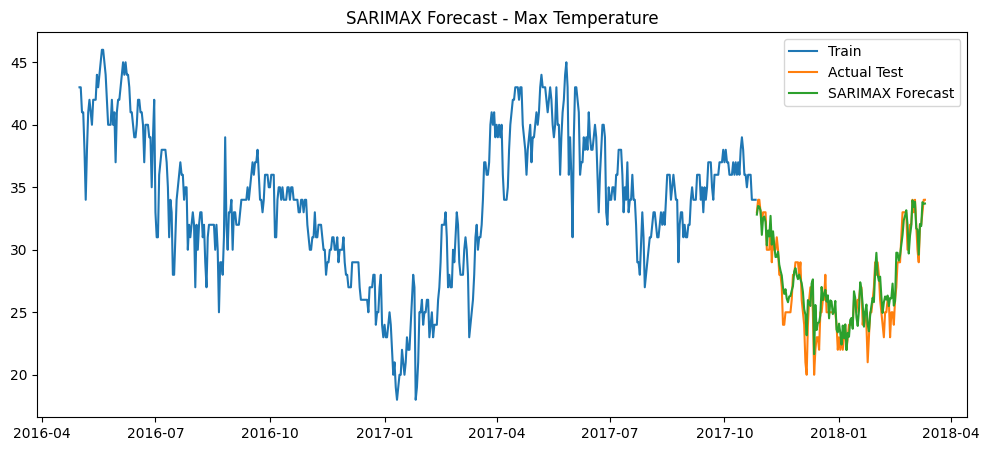

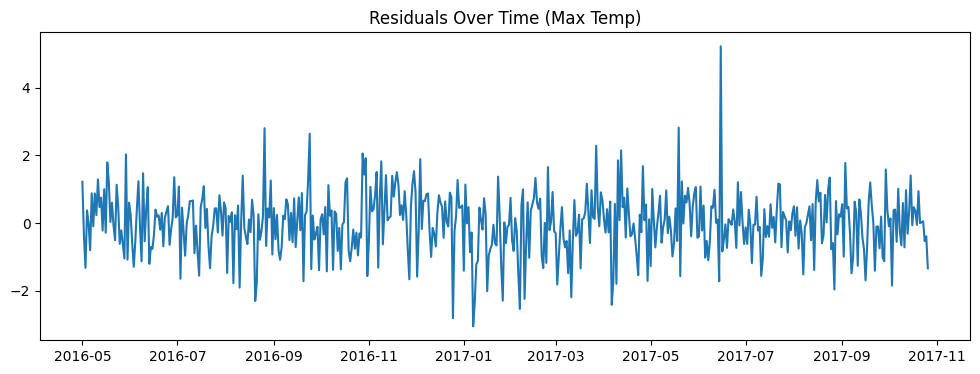

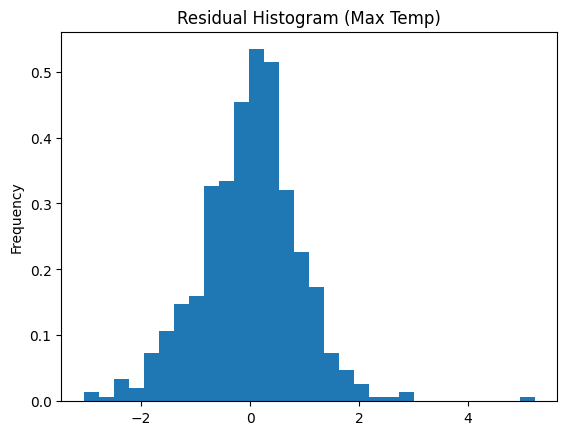

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Choose exogenous variables
exog_vars = [
    "meantempm", "meandewptm", "meanpressurem",
    "maxhumidity", "minhumidity",
    "maxdewptm", "mindewptm",
    "maxpressurem", "minpressurem",
    "precipm"
]

y_train = train["maxtempm"]
y_test  = test["maxtempm"]

# Fit SARIMAX model
sarimax_max = SARIMAX(
    y_train,
    order=(1,0,1),
    seasonal_order=(0,0,0,12),
    exog=train[exog_vars]
).fit(disp=False)

# Forecast
forecast_max = sarimax_max.forecast(
    steps=len(y_test),
    exog=test[exog_vars]
)

# Metrics
from sklearn.metrics import mean_absolute_error
mae_max = mean_absolute_error(y_test, forecast_max)
acc_max = 1 - mae_max / y_test.mean()

print("MAXTEMP SARIMAX MAE:", mae_max)
print("MAXTEMP SARIMAX Accuracy:", acc_max)
plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, label="Actual Test")
plt.plot(y_test.index, forecast_max, label="SARIMAX Forecast")
plt.title("SARIMAX Forecast - Max Temperature")
plt.legend()
plt.show()


res_max = sarimax_max.resid

plt.figure(figsize=(12,4))
plt.plot(res_max)
plt.title("Residuals Over Time (Max Temp)")
plt.show()


res_max.plot(kind='hist', bins=30, density=True)
plt.title("Residual Histogram (Max Temp)")
plt.show()



In [37]:
y_train_min = train["mintempm"]
X_train_min = train_exog   # same exogenous vars

auto_sarimax_min = auto_arima(
    y_train_min,
    X=X_train_min,
    seasonal=True,
    m=12,                      # annual seasonality approximated as 12 periods
    trace=True,
    suppress_warnings=True,
    error_action="ignore",
    stepwise=True
)

print(auto_sarimax_min.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1483.166, Time=4.94 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1540.981, Time=1.73 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1487.711, Time=5.49 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1500.447, Time=3.35 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1589.774, Time=3.44 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1480.740, Time=5.64 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1483.018, Time=1.76 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=1483.559, Time=5.88 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1481.239, Time=2.27 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1485.575, Time=7.74 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=1480.598, Time=2.25 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1482.546, Time=0.90 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1482.991, Time=2.43 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=1483.542, Time=6.41 sec
 ARIMA(1,0,2)(1,0,0

MINTEMP SARIMAX MAE: 0.9687823926996202
MINTEMP SARIMAX Accuracy: 0.9237973363752757


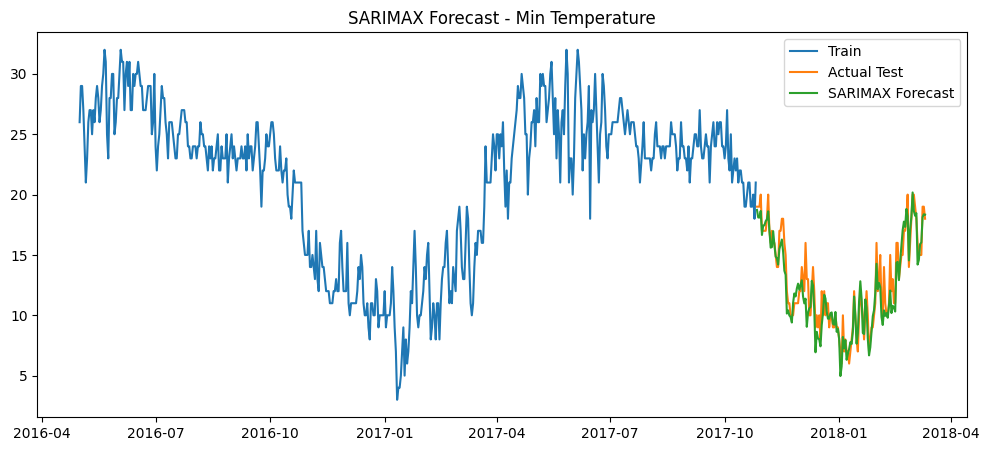

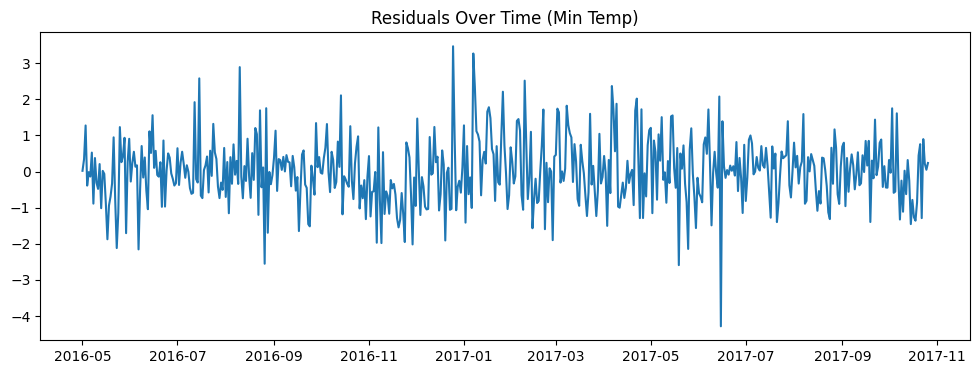

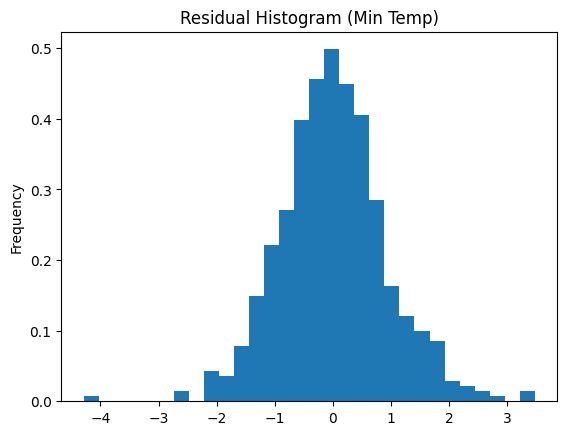

In [38]:
exog_vars_min = [
    "meantempm", "meandewptm", "meanpressurem",
    "maxhumidity", "minhumidity",
    "maxdewptm", "mindewptm",
    "maxpressurem", "minpressurem",
    "precipm"
]

y_train_min = train["mintempm"]
y_test_min  = test["mintempm"]

sarimax_min = SARIMAX(
    y_train_min,
    order=(0,0,4),
    seasonal_order=(1,0,0,12),
    exog=train[exog_vars_min]
).fit(disp=False)

forecast_min = sarimax_min.forecast(
    steps=len(y_test_min),
    exog=test[exog_vars_min]
)

mae_min = mean_absolute_error(y_test_min, forecast_min)
acc_min = 1 - mae_min / y_test_min.mean()

print("MINTEMP SARIMAX MAE:", mae_min)
print("MINTEMP SARIMAX Accuracy:", acc_min)

plt.figure(figsize=(12,5))
plt.plot(y_train_min.index, y_train_min, label="Train")
plt.plot(y_test_min.index, y_test_min, label="Actual Test")
plt.plot(y_test_min.index, forecast_min, label="SARIMAX Forecast")
plt.title("SARIMAX Forecast - Min Temperature")
plt.legend()
plt.show()


res_min = sarimax_min.resid

plt.figure(figsize=(12,4))
plt.plot(res_min)
plt.title("Residuals Over Time (Min Temp)")
plt.show()


res_min.plot(kind='hist', bins=30, density=True)
plt.title("Residual Histogram (Min Temp)")
plt.show()
